In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_excel("C:\\Users\\A B Siddik\\Desktop\\ARIMA\\data.xlsx")
data.head()

,Date,New COVID-19 Cases,Total Death COVID-19 Cases,New deaths COVID-19 Cases,Recoveries COVID-19 Cases,Day Average Temp,Rainfall (mm),Vaccination Rate,Population Density,Total Infected COVID-19 Cases
0,2021-01-04,1704,494,11,1010,26.4,11.5,0,96.254,3508.641
1,2021-01-05,1741,501,7,1221,26.5,1.0,0,96.254,3559.940
2,2021-01-06,2027,509,8,1129,27.7,0.0,0,96.254,3619.666
3,2021-01-07,2593,513,4,2145,26.9,25.8,0,96.254,3696.069
4,2021-01-08,3027,521,8,2708,27.5,0.0,0,96.254,3785.261


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['Recoveries COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(8, 1, 2))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:     Recoveries COVID-19 Cases   No. Observations:                  219
Model:                        ARIMA(8, 1, 2)   Log Likelihood               -1718.071
Date:                       Mon, 28 Jul 2025   AIC                           3458.142
Time:                               16:29:40   BIC                           3495.371
Sample:                           01-04-2021   HQIC                          3473.179
                                - 08-10-2021                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5230      0.111     -4.730      0.000      -0.740      -0.306
ar.L2          0.6332      0.147      4.308      0.000       0.345       0.

E:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
# Assuming your model is called `arima_model`
forecast = arima_model.forecast(steps=7)  # 7 days forecast
forecast.index = pd.date_range(start='2021-09-12', periods=7, freq='D')
print(forecast)


2021-09-12    16085.489614
2021-09-13    17043.039060
2021-09-14    17548.259519
2021-09-15    18154.961467
2021-09-16    18306.062328
2021-09-17    18319.153429
2021-09-18    18308.351076
Freq: D, Name: predicted_mean, dtype: float64


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['Recoveries COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(3, 1, 8))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:     Recoveries COVID-19 Cases   No. Observations:                  219
Model:                        ARIMA(3, 1, 8)   Log Likelihood               -1717.560
Date:                       Mon, 28 Jul 2025   AIC                           3459.121
Time:                               00:19:48   BIC                           3499.735
Sample:                           01-04-2021   HQIC                          3475.526
                                - 08-10-2021                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4062      0.127     -3.209      0.001      -0.654      -0.158
ar.L2          0.4775      0.112      4.263      0.000       0.258       0.

E:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['Recoveries COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(1, 1, 6))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:     Recoveries COVID-19 Cases   No. Observations:                  219
Model:                        ARIMA(1, 1, 6)   Log Likelihood               -1722.135
Date:                       Mon, 28 Jul 2025   AIC                           3460.270
Time:                               00:23:07   BIC                           3487.346
Sample:                           01-04-2021   HQIC                          3471.207
                                - 08-10-2021                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9350      0.051     18.445      0.000       0.836       1.034
ma.L1         -1.1884      0.087    -13.638      0.000      -1.359      -1.

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['Recoveries COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(1, 1, 5))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:     Recoveries COVID-19 Cases   No. Observations:                  219
Model:                        ARIMA(1, 1, 5)   Log Likelihood               -1723.692
Date:                       Mon, 28 Jul 2025   AIC                           3461.383
Time:                               00:24:59   BIC                           3485.075
Sample:                           01-04-2021   HQIC                          3470.953
                                - 08-10-2021                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9569      0.041     23.416      0.000       0.877       1.037
ma.L1         -1.2330      0.080    -15.427      0.000      -1.390      -1.

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['Recoveries COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(1, 1, 4))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:     Recoveries COVID-19 Cases   No. Observations:                  219
Model:                        ARIMA(1, 1, 4)   Log Likelihood               -1723.642
Date:                       Mon, 28 Jul 2025   AIC                           3459.284
Time:                               00:26:51   BIC                           3479.591
Sample:                           01-04-2021   HQIC                          3467.486
                                - 08-10-2021                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9593      0.034     27.860      0.000       0.892       1.027
ma.L1         -1.2363      0.073    -17.017      0.000      -1.379      -1.

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['Recoveries COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(0, 3, 4))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                   SARIMAX Results                                   
Dep. Variable:     Recoveries COVID-19 Cases   No. Observations:                  219
Model:                        ARIMA(0, 3, 4)   Log Likelihood               -1722.643
Date:                       Mon, 28 Jul 2025   AIC                           3455.287
Time:                               00:29:32   BIC                           3472.163
Sample:                           01-04-2021   HQIC                          3462.105
                                - 08-10-2021                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.2506      0.092    -24.368      0.000      -2.432      -2.070
ma.L2          1.5488      0.174      8.891      0.000       1.207       1.

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# === Load and preprocess data ===
data = pd.read_excel("C:\\Users\\A B Siddik\\Desktop\\ARIMA\\data.xlsx")
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

target_col = 'Recoveries COVID-19 Cases'
target_series = data[[target_col, 'Date']].copy()

# === Define date-based splits (same as ARIMA) ===
train_data = target_series[(target_series['Date'] <= '2021-08-10')]
test_data = target_series[(target_series['Date'] >= '2021-08-11') & (target_series['Date'] <= '2021-09-18')]

# === Normalize based on training only ===
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[[target_col]])
test_scaled = scaler.transform(test_data[[target_col]])

# === Create sequences ===
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 10
x_train, y_train = create_sequences(train_scaled, seq_length)
x_test, y_test = create_sequences(test_scaled, seq_length)

# === Build and train LSTM model ===
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=200, batch_size=16, verbose=1)

# === Predict on test set ===
y_pred = model.predict(x_test)

# === Inverse scale predictions and true values ===
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# === Evaluate LSTM model ===
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(y_test_rescaled) - np.min(y_test_rescaled))
nrmse = rmse / np.mean(y_test_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("\n📊 Final LSTM Forecast Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0588
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0035
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031
Epoch 13/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030
Epoch 14/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039
Epoch 15/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss:

In [12]:
# === Define forecast horizon (same as your ARIMA example) ===
forecast_horizon = pd.date_range(start='2021-09-12', end='2021-09-18')

# === Start with the last known sequence from test data ===
last_sequence = test_scaled[-seq_length:]  # shape (10, 1)

forecast_scaled = []

for _ in range(len(forecast_horizon)):
    # Reshape to (1, seq_len, 1) for LSTM input
    input_seq = last_sequence.reshape((1, seq_length, 1))

    # Predict next value
    next_scaled = model.predict(input_seq, verbose=0)[0][0]

    # Append prediction
    forecast_scaled.append([next_scaled])

    # Update sequence: drop first, append prediction
    last_sequence = np.vstack((last_sequence[1:], [[next_scaled]]))

# Inverse transform forecasted values
forecast_scaled = np.array(forecast_scaled)
forecast_rescaled = scaler.inverse_transform(forecast_scaled)

# Convert to Pandas Series with date index
lstm_forecast_series = pd.Series(forecast_rescaled.flatten(), index=forecast_horizon)

print("\n📈 LSTM Rolling Forecast:")
print(lstm_forecast_series)



📈 LSTM Rolling Forecast:
2021-09-12    19172.712891
2021-09-13    21005.925781
2021-09-14    22725.193359
2021-09-15    23969.257812
2021-09-16    24978.625000
2021-09-17    25956.201172
2021-09-18    27059.048828
Freq: D, dtype: float32


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Epoch 1/200


E:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1791
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0260
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0240
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0168
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0234
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0189
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0178
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0199
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0194
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0180
Epoch 12/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0182
Epoch 13/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0213
Epoch 14/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0199
Epoch 15/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161
Epoch 16/200

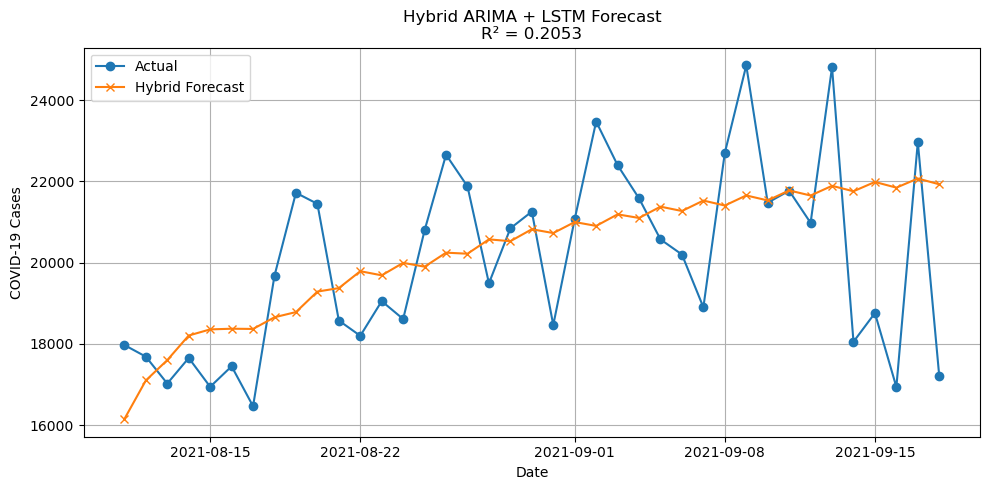

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# === Step 1: Load and prepare data ===
data = pd.read_excel("C:\\Users\\A B Siddik\\Desktop\\ARIMA\\data.xlsx")
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

target_col = 'Recoveries COVID-19 Cases'
ts = data.set_index('Date')[target_col]

# === Step 2: Train/test split ===
train_ts = ts[:'2021-08-10']
test_ts = ts['2021-08-11':'2021-09-18']

# === Step 3: Fit best ARIMA model ===
best_order = (8, 1, 2)  # Use your best found (p,d,q) here
arima_model = ARIMA(train_ts, order=best_order).fit()

# === Step 4: Forecast on test set using ARIMA ===
arima_forecast = arima_model.forecast(steps=len(test_ts))
arima_forecast.index = test_ts.index

# === Step 5: Calculate residuals on training data ===
arima_pred_train = arima_model.predict(start=train_ts.index[1], end=train_ts.index[-1])
residuals = train_ts[1:] - arima_pred_train

# === Step 6: Scale residuals and create LSTM sequences ===
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_len = 10
x_lstm, y_lstm = create_sequences(residuals_scaled, seq_len)

# === Step 7: Build and train LSTM ===
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_lstm, y_lstm, epochs=200, batch_size=16, verbose=1)

# === Step 8: Predict residuals on test set ===
resid_history = residuals_scaled[-seq_len:].flatten().tolist()
lstm_pred_scaled = []

for _ in range(len(test_ts)):
    input_seq = np.array(resid_history[-seq_len:]).reshape(1, seq_len, 1)
    pred = model.predict(input_seq, verbose=0)[0][0]
    lstm_pred_scaled.append(pred)
    resid_history.append(pred)

lstm_pred_resid = scaler.inverse_transform(np.array(lstm_pred_scaled).reshape(-1, 1)).flatten()

# === Step 9: Final hybrid forecast ===
hybrid_forecast = arima_forecast.values + lstm_pred_resid

# === Step 10: Evaluate hybrid model ===
actual = test_ts.values
mse = mean_squared_error(actual, hybrid_forecast)
mae = mean_absolute_error(actual, hybrid_forecast)
mape = np.mean(np.abs((actual - hybrid_forecast) / actual)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(actual) - np.min(actual))
nrmse = rmse / np.mean(actual)
r2 = r2_score(actual, hybrid_forecast)

print("\n📊 Final Hybrid ARIMA + LSTM Forecast Evaluation:")
print(f"ARIMA Order Used: {best_order}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# === Plot actual vs hybrid forecast ===
plt.figure(figsize=(10, 5))
plt.plot(test_ts.index, actual, label='Actual', marker='o')
plt.plot(test_ts.index, hybrid_forecast, label='Hybrid Forecast', marker='x')
plt.title(f"Hybrid ARIMA + LSTM Forecast\nR² = {r2:.4f}")
plt.xlabel("Date")
plt.ylabel("COVID-19 Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# === Extract hybrid forecast for 12/9/21 to 18/9/21 ===
forecast_range = pd.date_range(start='2021-09-12', end='2021-09-18')
hybrid_forecast_series = pd.Series(hybrid_forecast, index=test_ts.index)
selected_forecast = hybrid_forecast_series.loc[forecast_range]

# Print forecasted values for the selected range
print("\n📅 Hybrid Forecast: 12/09/2021 to 18/09/2021")
print(selected_forecast.round(0).astype(int))



📅 Hybrid Forecast: 12/09/2021 to 18/09/2021
2021-09-12    21653
2021-09-13    21891
2021-09-14    21757
2021-09-15    21987
2021-09-16    21847
2021-09-17    22071
2021-09-18    21929
dtype: int32


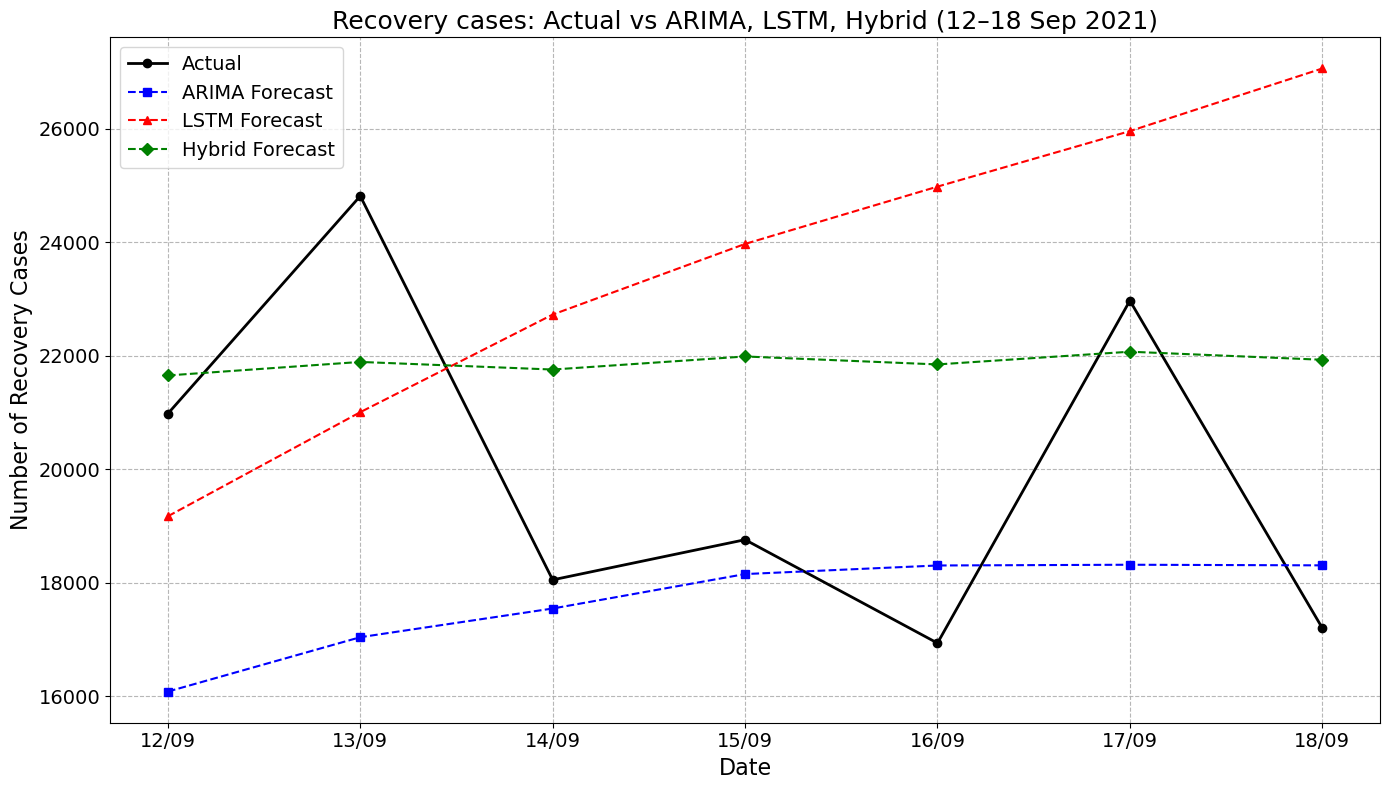

In [22]:
import matplotlib.pyplot as plt

# Dates
dates = ['12/09', '13/09', '14/09', '15/09', '16/09', '17/09', '18/09']

# Actual and forecast values
actual = [20980, 24813, 18053, 18760, 16939, 22970, 17205]
arima = [16085.49, 17043.04, 17548.26, 18154.96, 18306.06, 18319.15, 18308.35]
lstm = [19172.71, 21005.93, 22725.19, 23969.26, 24978.63, 25956.20, 27059.05]
hybrid = [21653, 21891, 21757, 21987, 21847, 22071, 21929]

# Plotting
plt.figure(figsize=(14, 8))  # Bigger figure size

plt.plot(dates, actual, marker='o', label='Actual', color='black', linewidth=2)
plt.plot(dates, arima, marker='s', label='ARIMA Forecast', color='blue', linestyle='--')
plt.plot(dates, lstm, marker='^', label='LSTM Forecast', color='red', linestyle='--')
plt.plot(dates, hybrid, marker='D', label='Hybrid Forecast', color='green', linestyle='--')

# Labels and title with larger fonts
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Recovery Cases', fontsize=16)
plt.title('Recovery cases: Actual vs ARIMA, LSTM, Hybrid (12–18 Sep 2021)', fontsize=18)

# Ticks font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Legend with larger font
plt.legend(fontsize=14)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.9)
plt.tight_layout()

# Show the plot
plt.show()
